# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
In "Mouse Weight vs. Average Tumor Volume for Capomulin Regimen". There is a clear positive correlation between mouse weight and average tumor volume.
In the "Distribution of Tumor Volume for Each Treatment Group" graph, regimens of Infubinol and Ceftamin have much higher average Tumor Volume than Capomulin and Ramicane.
In the # of Observed Timepoints Bar Graph, Capomulin and Ramicane have more observed timepoints than all other drug regimens.

In [120]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
print(mouse_metadata)
print(study_results)
merge = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "inner")
# Display the data table for preview
df = merge[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 
            'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]
df.head()

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0    

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [5]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [23]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df.loc[df["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df = df.loc[df["Mouse ID"] != "g989"]

In [25]:
# Checking the number of mice in the clean DataFrame.
new_df["Mouse ID"].nunique()

248

## Summary Statistics

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_data = new_df.groupby("Drug Regimen")

mean = grouped_data["Tumor Volume (mm3)"].mean()
median = grouped_data["Tumor Volume (mm3)"].median()
var = grouped_data["Tumor Volume (mm3)"].var()
std = grouped_data["Tumor Volume (mm3)"].std()
sem = grouped_data["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({"Mean Tumor Volume":mean , "Median Tumor Volume":median,
                              "Tumor Volume Variance":var, "Tumor Volume Standard Deviation":std,
                              "Tumor Volume Standard Error":sem})

print(summary_stats)

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Standard Deviation  Tumo

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats = new_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Using the aggregation method, produce the same summary statistics in a single line
print(summary_stats)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Timepoints')

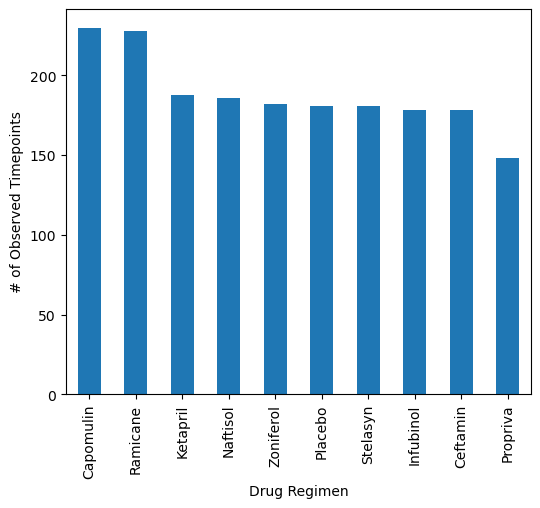

In [48]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_regimen = new_df["Drug Regimen"].value_counts()
count_regimen.plot(kind="bar", figsize=(6,5))
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Timepoints")

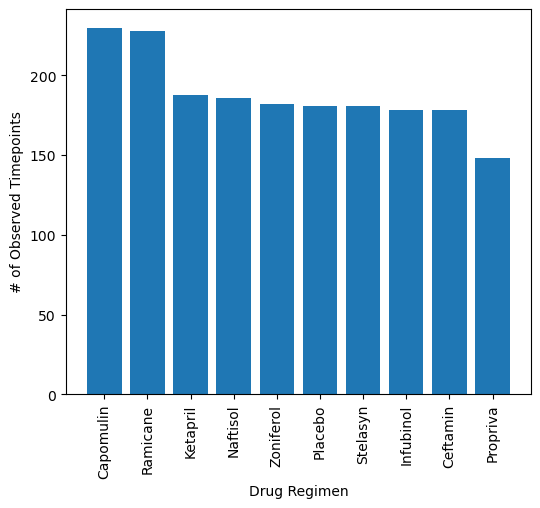

In [59]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_names = count_regimen.index

plt.figure(figsize=(6,5))
plt.bar(regimen_names, count_regimen)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Timepoints")
plt.show()

Text(0.5, 1.0, 'Distribution of Female versus Male Mice')

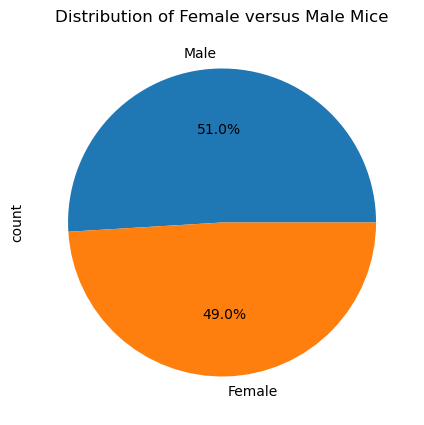

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = new_df["Sex"].value_counts()

gender.plot(kind="pie", autopct='%1.1f%%', figsize=(5,5))
plt.title("Distribution of Female versus Male Mice")


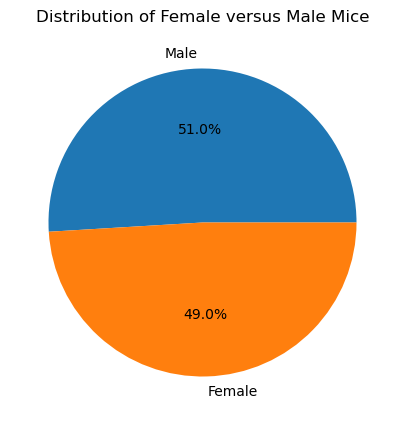

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(5,5))
plt.pie(gender, labels=gender.index, autopct="%1.1f%%")
plt.title("Distribution of Female versus Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [75]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_per_mouse = new_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_volume = pd.merge(last_timepoint_per_mouse, new_df, on=["Mouse ID", "Timepoint"], how='inner')


In [81]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:   
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_volume.loc[final_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)

    potential_outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    outliers.extend(potential_outliers)

    print(f"{treatment}'s potential outliers: {potential_outliers}")
    
print(outliers)
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
[36.3213458]


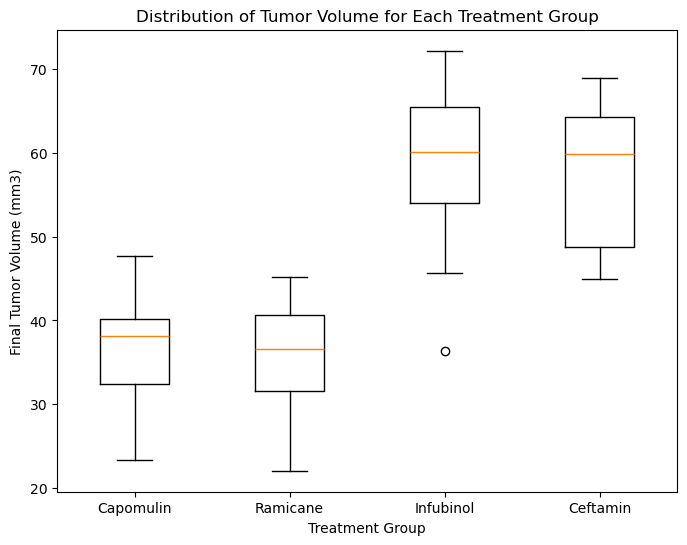

In [88]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_treatment = []

for treatment in treatments:
    tumor_volumes = final_volume.loc[final_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_treatment.append(tumor_volumes)
    
plt.figure(figsize=(8, 6))
plt.boxplot(tumor_treatment, labels=treatments)
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

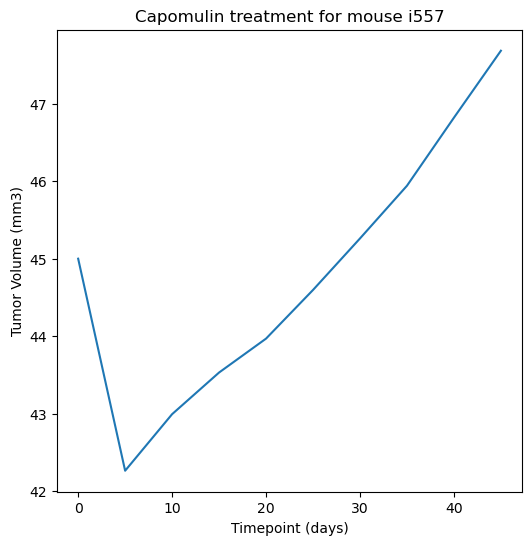

In [108]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "i557"

capomulin_mouse_data = new_df.loc[(new_df['Drug Regimen'] == 'Capomulin') & (new_df['Mouse ID'] == mouse_id)]

plt.figure(figsize=(6, 6))
plt.plot(capomulin_mouse_data['Timepoint'], capomulin_mouse_data['Tumor Volume (mm3)'], linestyle='-')
plt.title(f'Capomulin treatment for mouse {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

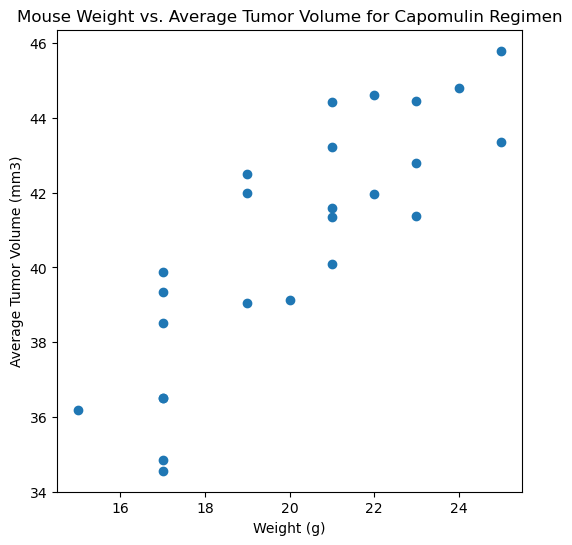

In [118]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_weights = new_df.loc[new_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)"].mean()
capomulin_tumor = new_df.loc[new_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

plt.figure(figsize=(6, 6))
plt.scatter(capomulin_weights, capomulin_tumor)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


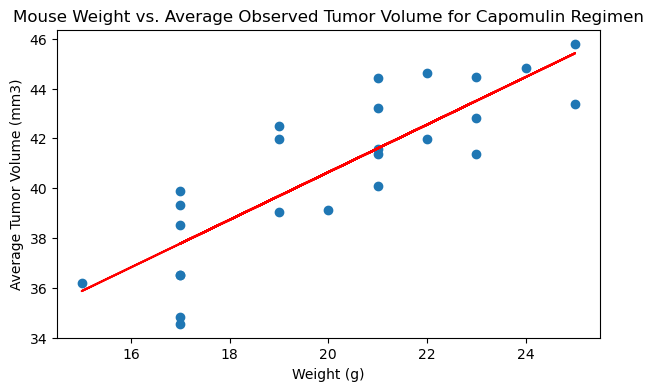

In [130]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_coefficient = st.pearsonr(capomulin_weights, capomulin_tumor)[0]
correlation_coefficient = round(correlation_coefficient, 2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient}.")

slope, intercept, rvalue, pvalue, stderr = st.linregress(capomulin_weights, capomulin_tumor)

plt.figure(figsize=(7, 4))
plt.scatter(capomulin_weights, capomulin_tumor)
plt.title('Mouse Weight vs. Average Observed Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Plot the linear regression line
plt.plot(capomulin_weights, slope * capomulin_weights + intercept, color='red')

plt.show()
